In [1]:
from astropy.table import Table
import numpy as np
import math
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import optimize
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.coordinates import match_coordinates_sky

# Render our plots inline
%matplotlib inline

In [2]:
def plot_basic(x, y, label = ["", "", ""], limits = None,legend = False, ax = None):
    """
    Label = [xaxis, yaxis, data]
    limits = [xmin,xmax,ymin,ymax]
    """
    sns.set_context("paper",font_scale=2.5)
    sns.set_style("white")
    sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
    if ax == None:
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(11.7, 8.27)
        ax.tick_params(axis='x',top='on')
        ax.tick_params(axis='y',right='on')
        ax.set_xlabel(str(label[0]))
        ax.set_ylabel(str(label[1]))
        if limits != None:
            ax.set_xlim(limits[0], limits[1])
            ax.set_ylim(limits[2], limits[3])
    else:
        ax = ax
    sc = ax.scatter(x, y, label = str(label[2]))
    if legend != False:
        legend = plt.legend(loc = 4,  frameon=True)
        frame = legend.get_frame()
        frame.set_edgecolor('k')
        frame.set_lw(1)
    return(sc)

# Reading the need table

In [3]:
Dir = r'/Users/vaishaliparkash/Dropbox/Office_mac/python_code/2mrs/table/'

Filename = r'wise_2MRS-phot_26Aug2019.csv'

Tom_df = pd.read_csv(Dir+Filename)

Filename = r'irsa_catalog_search_results.csv'

ALLWISE_df = pd.read_csv(Dir+Filename)

# Prints out column name if needed

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Tom_cols = Tom_df.columns.tolist()
print(Tom_cols,'\n')

ALLWISE_cols = ALLWISE_df.columns.tolist()
print(ALLWISE_cols,'\n')

['desig', 'ra', 'dec', 'w1best', 'w1berr', 'w1f', 'w2best', 'w2berr', 'w2f', 'w3best', 'w3berr', 'w3f', 'w4best', 'w4berr', 'w4f', 'W1snr', 'W2snr', 'W3snr', 'W4snr', 'tile', 'Riso', 'R2iso', 'R3iso', 'R4iso', 'ba', 'pa', 'flux_1', 'err_1', 'mag_1', 'merr_1', 'flg1', 'flux_2', 'err_2', 'mag_2', 'merr_2', 'flg2', 'flux_3', 'err_3', 'mag_3', 'merr_3', 'flg3', 'flux_4', 'err_4', 'mag_4', 'merr_4', 'flg4', 'W1W2', 'W1W2er', 'W2W3', 'W2W3er', 'W1W3', 'W1W3er', 'W3W4', 'W3W4er', 'meanSB_1', 'meanSB_2', 'meanSB_3', 'meanSB_4', 'sky_1', 'sig_1', 'sky_2', 'sig_2', 'sky_3', 'sig_3', 'sky_4', 'sig_4', 'R1iso', 'R2iso.1', 'R3iso.1', 'R4iso.1', 'SB_1', 'SB_2', 'SB_3', 'SB_4', 'scale_1a', 'scale_1b', 'beta_1a', 'beta_1b', 'scale_2a', 'scale_2b', 'beta_2a', 'beta_2b', 'scale_3a', 'scale_3b', 'beta_3a', 'beta+3b', 'scale_4a', 'scale_4b', 'beta_4a', 'beta_4b', 'Rtot_1', 'ftot_1', 'ftoterr_1', 'mtot_1', 'mterr1', 'Rtot_2', 'ftot_2', 'ftoterr_2', 'mtot_2', 'mterr2', 'Rtot_3', 'ftot_3', 'ftoterr_3', 'mtot

# Matching Tom's photometry table to the ALLWISE photometry table

In [5]:
Tom_coord = SkyCoord(ra = Tom_df.ra, dec = Tom_df.dec, unit = "deg")
ALLWISE_coord = SkyCoord(ra = ALLWISE_df.ra_01, dec = ALLWISE_df.dec_01, unit = "deg")

"""
Using astropy "match_to_catalog_sky" I am finding the closet match for all the galaxies in Tom's table using the 
ALLWISE table. The output is the same size as Tom's table
idx is the index in ALLWISE that it matches and d2d is the distance separation
"""
idx, d2d, d3d = Tom_coord.match_to_catalog_sky(ALLWISE_coord)

In [6]:
max_sep = 10 * u.arcsec
sep_constraint = d2d < max_sep

Tom_df_matches = Tom_df[sep_constraint]
ALLWISE_df_matches = ALLWISE_df.iloc[idx[sep_constraint]]
Tom_df_matches = Tom_df_matches.reset_index()
ALLWISE_df_matches = ALLWISE_df_matches.reset_index()

In [7]:
print(Tom_df_matches.shape,'\n')
print(ALLWISE_df_matches.shape,'\n')

(8762, 166) 

(8762, 106) 



In [8]:
# Place the DataFrames side by side
ALL_phot_df = pd.concat([Tom_df_matches, ALLWISE_df_matches], axis=1)
print(ALL_phot_df.shape,'\n')

ALL_phot_cols = ALL_phot_df.columns.tolist()
print(ALL_phot_cols,'\n')
print(ALL_phot_df.iloc[0])

(8762, 272) 

['index', 'desig', 'ra', 'dec', 'w1best', 'w1berr', 'w1f', 'w2best', 'w2berr', 'w2f', 'w3best', 'w3berr', 'w3f', 'w4best', 'w4berr', 'w4f', 'W1snr', 'W2snr', 'W3snr', 'W4snr', 'tile', 'Riso', 'R2iso', 'R3iso', 'R4iso', 'ba', 'pa', 'flux_1', 'err_1', 'mag_1', 'merr_1', 'flg1', 'flux_2', 'err_2', 'mag_2', 'merr_2', 'flg2', 'flux_3', 'err_3', 'mag_3', 'merr_3', 'flg3', 'flux_4', 'err_4', 'mag_4', 'merr_4', 'flg4', 'W1W2', 'W1W2er', 'W2W3', 'W2W3er', 'W1W3', 'W1W3er', 'W3W4', 'W3W4er', 'meanSB_1', 'meanSB_2', 'meanSB_3', 'meanSB_4', 'sky_1', 'sig_1', 'sky_2', 'sig_2', 'sky_3', 'sig_3', 'sky_4', 'sig_4', 'R1iso', 'R2iso.1', 'R3iso.1', 'R4iso.1', 'SB_1', 'SB_2', 'SB_3', 'SB_4', 'scale_1a', 'scale_1b', 'beta_1a', 'beta_1b', 'scale_2a', 'scale_2b', 'beta_2a', 'beta_2b', 'scale_3a', 'scale_3b', 'beta_3a', 'beta+3b', 'scale_4a', 'scale_4b', 'beta_4a', 'beta_4b', 'Rtot_1', 'ftot_1', 'ftoterr_1', 'mtot_1', 'mterr1', 'Rtot_2', 'ftot_2', 'ftoterr_2', 'mtot_2', 'mterr2', 'Rtot_3', 'ftot

In [9]:
"""
The combined table has duplicate column names because the 2 phot files have the same columns.
I.E. both have w1mpro.
I am going to index them so they don't have the same name
But I need to careful about which one I call. The first half of the table is Tom's phot table
and the second half is ALLWISE. The divider column is "index"
"""
cols=pd.Series(ALL_phot_df.columns)
duplicates = cols[cols.duplicated()].unique()
duplicates = duplicates
print(duplicates, '\n')
fmt = '%s_%01d'
for name in duplicates:
    dups = cols == name
    ret = [ fmt%(name,i) if (i!=0) else name
                      for i in range(dups.sum()) ]
    cols.loc[dups] = ret
#     print(ret)
ALL_phot_df.columns = cols

ALL_phot_cols = ALL_phot_df.columns.tolist()
print(ALL_phot_cols,'\n')

['index' 'ra' 'dec' 'w1mpro' 'w1rchi2' 'w2mpro' 'w2rchi2' 'w3mpro'
 'w3rchi2' 'w4mpro' 'w4rchi2' 'xscprox'] 

['index', 'desig', 'ra', 'dec', 'w1best', 'w1berr', 'w1f', 'w2best', 'w2berr', 'w2f', 'w3best', 'w3berr', 'w3f', 'w4best', 'w4berr', 'w4f', 'W1snr', 'W2snr', 'W3snr', 'W4snr', 'tile', 'Riso', 'R2iso', 'R3iso', 'R4iso', 'ba', 'pa', 'flux_1', 'err_1', 'mag_1', 'merr_1', 'flg1', 'flux_2', 'err_2', 'mag_2', 'merr_2', 'flg2', 'flux_3', 'err_3', 'mag_3', 'merr_3', 'flg3', 'flux_4', 'err_4', 'mag_4', 'merr_4', 'flg4', 'W1W2', 'W1W2er', 'W2W3', 'W2W3er', 'W1W3', 'W1W3er', 'W3W4', 'W3W4er', 'meanSB_1', 'meanSB_2', 'meanSB_3', 'meanSB_4', 'sky_1', 'sig_1', 'sky_2', 'sig_2', 'sky_3', 'sig_3', 'sky_4', 'sig_4', 'R1iso', 'R2iso.1', 'R3iso.1', 'R4iso.1', 'SB_1', 'SB_2', 'SB_3', 'SB_4', 'scale_1a', 'scale_1b', 'beta_1a', 'beta_1b', 'scale_2a', 'scale_2b', 'beta_2a', 'beta_2b', 'scale_3a', 'scale_3b', 'beta_3a', 'beta+3b', 'scale_4a', 'scale_4b', 'beta_4a', 'beta_4b', 'Rtot_1', 'ftot_1', 'ftot

# Plotting

In [10]:
######## Functions for fitting data
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err
def bestfit(x,y,yerr):
    pinit = [1.0, -1.0]
    out = optimize.leastsq(errfunc, pinit,args=(x, y , yerr), full_output=1)
    pfinal_fit, covar = out[0], out[1]
    amp, index = pfinal_fit[0],  pfinal_fit[1] # aka the y-int (normalization) & slope
    indexErr, ampErr = np.sqrt( covar[1][1] ), np.sqrt( covar[0][0] )
    return amp, index

def bestfit_err(x,y,yerr):
    pinit = [1.0, -1.0]
    out = optimize.leastsq(errfunc, pinit,args=(x, y , yerr), full_output=1)
    pfinal_fit, covar = out[0], out[1]
    amp, index = pfinal_fit[0],  pfinal_fit[1] # aka the y-int (normalization) & slope
    indexErr, ampErr = np.sqrt( covar[1][1] ), np.sqrt( covar[0][0] )
    return amp, index, ampErr, indexErr

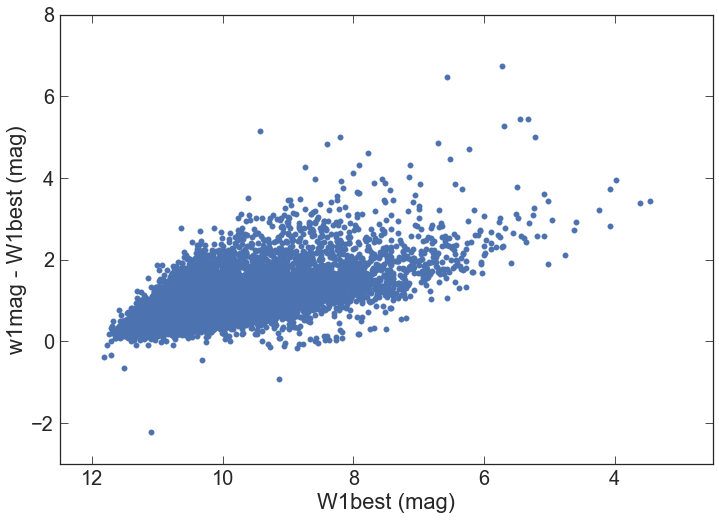

In [11]:
limits = [12.5,2.5,-3,8]
label = ['W1best (mag)','w1mag - W1best (mag)','']
x = ALL_phot_df.w1best[ALL_phot_df.w1snr > 5]
y = ALL_phot_df.w1mag[ALL_phot_df.w1snr > 5] - x
plot_basic(x, y, label, limits=limits)

plt.savefig('plots/w1_mag_best.pdf', bbox_inches='tight')

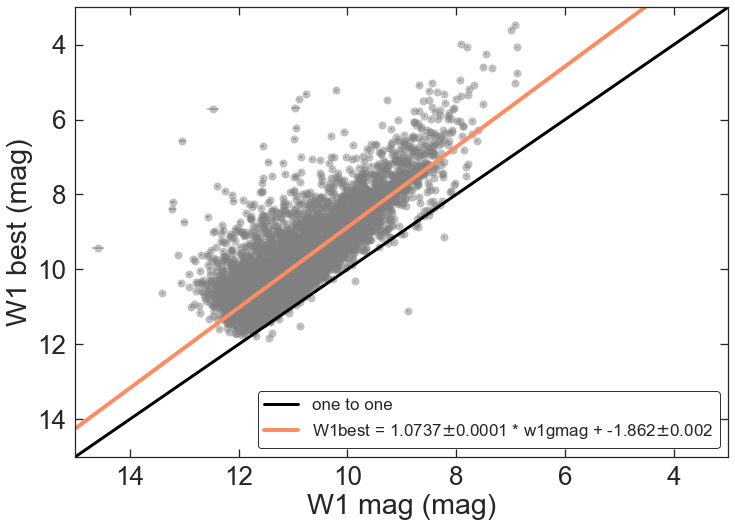

In [12]:
import warnings
warnings.filterwarnings('ignore')

sns.set_context("talk",font_scale=2.0)
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(11.7, 8.27)

myColors = sns.color_palette("Set2", 4)
# colors = itertools.cycle(myColors)

x = ALL_phot_df.w1mag[ALL_phot_df.w1snr > 5]
y = ALL_phot_df.w1best[ALL_phot_df.w1snr > 5]
x_err = ALL_phot_df.w1sigm[ALL_phot_df.w1snr > 5]
y_err = ALL_phot_df.w1berr[ALL_phot_df.w1snr > 5]

# y = y[~x.mask]
# y_err = y_err[~x.mask]
# x_err = x_err[~x.mask]
# x = x[~x.mask]

plt.errorbar(x, y, yerr = y_err, xerr = x_err, c = 'grey' ,fmt='o', 
             ecolor='grey', ms = 8, elinewidth=2, alpha= 0.5, 
             zorder=-32,label = "") 

plt.plot([0,15],[0,15], 'k', lw = 3, label ='one to one')

yint_w1, slope_w1, yint_err_w1, slope_err_w1 = bestfit_err(x, y, y_err)
new = fitfunc([yint_w1, slope_w1], np.linspace(0,15,15))
plt.plot(np.linspace(0,15,15), new,
         color = myColors[1], linewidth=4.0,
         label = r'W1best = %5.4f$\pm$%5.4f * w1gmag + %5.3f$\pm$%5.3f'  
         %(slope_w1, slope_err_w1, yint_w1, yint_err_w1))


# yint_w1_g, slope_w1_g, yint_err_w1_g, slope_err_w1_g = bestfit_err(
#     x[np.where(x > 8)], y[np.where(x > 8)], y_err[np.where(x > 8)])
# new = fitfunc([yint_w1_g, slope_w1_g], np.linspace(8,14,12))
# plt.plot(np.linspace(8,14,12), new, ls = '--', linewidth=4.0, color = myColors[0],
#          label = r'W1best = %5.4f$\pm$%5.4f * w1gmag + %5.3f$\pm$%5.3f'  
#          %(slope_w1_g, slope_err_w1_g, yint_w1_g, yint_err_w1_g))

# yint_w1_l, slope_w1_l, yint_err_w1_l, slope_err_w1_l = bestfit_err(
#     x[np.where(x <= 8)], y[np.where(x <=8)], y_err[np.where(x <= 8)])
# new = fitfunc([yint_w1_l, slope_w1_l], np.linspace(0,8,12))
# plt.plot(np.linspace(0,8,12), new, ls = '--', linewidth=4.0,
#          color = sns.xkcd_rgb['fuchsia'],
#          label = r'W1best = %5.4f$\pm$%5.4f * w1gmag + %5.3f$\pm$%5.3f'  
#          %(slope_w1_l, slope_err_w1_l, yint_w1_l, yint_err_w1_l))


ax.tick_params(axis='x',top='on')
ax.tick_params(axis='y',right='on')
plt.ylim(15,3)
plt.xlim(15,3.)
plt.ylabel('W1 best (mag)')
plt.xlabel('W1 mag (mag)')

# # plt.text(14, 4.,"(a)",color= 'k', fontsize=25, fontweight = 'bold')

legend = plt.legend(loc = 4,  frameon=True,  fontsize=17  )
legend.set_zorder(0)
frame = legend.get_frame()
frame.set_edgecolor('k')
frame.set_lw(1)

plt.savefig('plots/w1_mag_best_fit.pdf', bbox_inches='tight')

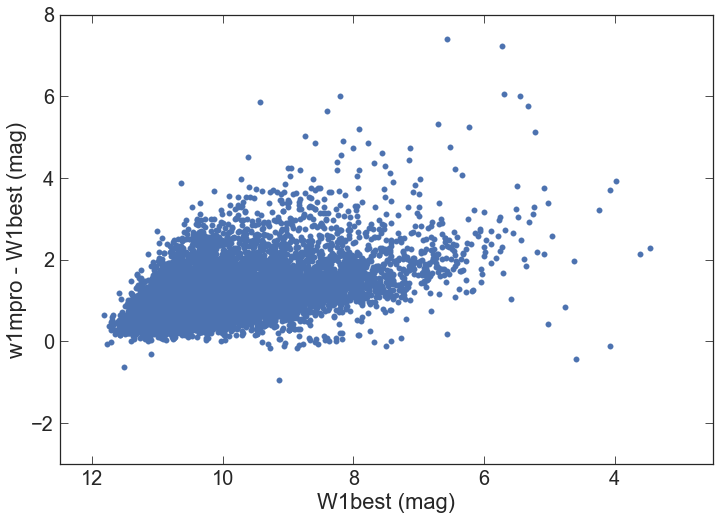

In [13]:
limits = [12.5,2.5,-3,8]
label = ['W1best (mag)','w1mpro - W1best (mag)','']
x = ALL_phot_df.w1best[ALL_phot_df.w1snr > 5]
y = ALL_phot_df.w1mpro_1[ALL_phot_df.w1snr > 5] - x
plot_basic(x, y, label, limits=limits)

plt.savefig('plots/w1_mpro_best.pdf', bbox_inches='tight')

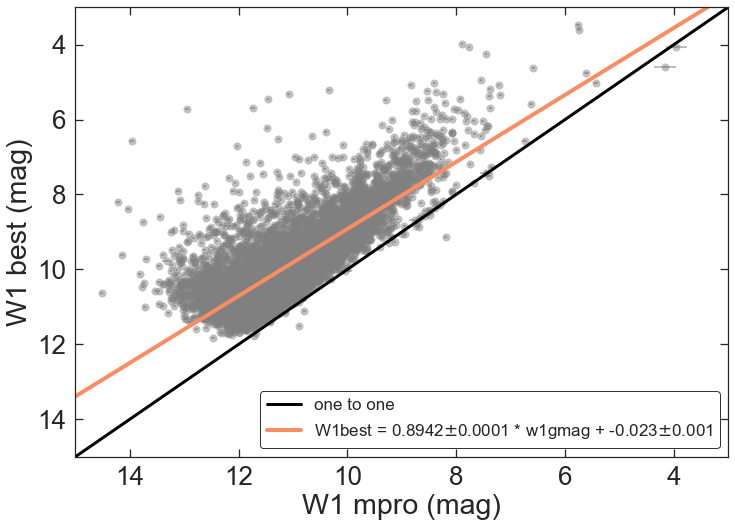

In [14]:
import warnings
warnings.filterwarnings('ignore')

sns.set_context("talk",font_scale=2.0)
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8})
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(11.7, 8.27)

myColors = sns.color_palette("Set2", 4)
# colors = itertools.cycle(myColors)

x = ALL_phot_df.w1mpro_1[ALL_phot_df.w1snr > 5]
y = ALL_phot_df.w1best[ALL_phot_df.w1snr > 5]
x_err = ALL_phot_df.w1sigmpro[ALL_phot_df.w1snr > 5]
y_err = ALL_phot_df.w1berr[ALL_phot_df.w1snr > 5]

# y = y[~x.mask]
# y_err = y_err[~x.mask]
# x_err = x_err[~x.mask]
# x = x[~x.mask]

plt.errorbar(x, y, yerr = y_err, xerr = x_err, c = 'grey' ,fmt='o', 
             ecolor='grey', ms = 8, elinewidth=2, alpha= 0.5, 
             zorder=-32,label = "") 

plt.plot([0,15],[0,15], 'k', lw = 3, label ='one to one')

yint_w1, slope_w1, yint_err_w1, slope_err_w1 = bestfit_err(x, y, y_err)
new = fitfunc([yint_w1, slope_w1], np.linspace(0,15,15))
plt.plot(np.linspace(0,15,15), new,
         color = myColors[1], linewidth=4.0,
         label = r'W1best = %5.4f$\pm$%5.4f * w1gmag + %5.3f$\pm$%5.3f'  
         %(slope_w1, slope_err_w1, yint_w1, yint_err_w1))


# yint_w1_g, slope_w1_g, yint_err_w1_g, slope_err_w1_g = bestfit_err(
#     x[np.where(x > 8)], y[np.where(x > 8)], y_err[np.where(x > 8)])
# new = fitfunc([yint_w1_g, slope_w1_g], np.linspace(8,14,12))
# plt.plot(np.linspace(8,14,12), new, ls = '--', linewidth=4.0, color = myColors[0],
#          label = r'W1best = %5.4f$\pm$%5.4f * w1gmag + %5.3f$\pm$%5.3f'  
#          %(slope_w1_g, slope_err_w1_g, yint_w1_g, yint_err_w1_g))

# yint_w1_l, slope_w1_l, yint_err_w1_l, slope_err_w1_l = bestfit_err(
#     x[np.where(x <= 8)], y[np.where(x <=8)], y_err[np.where(x <= 8)])
# new = fitfunc([yint_w1_l, slope_w1_l], np.linspace(0,8,12))
# plt.plot(np.linspace(0,8,12), new, ls = '--', linewidth=4.0,
#          color = sns.xkcd_rgb['fuchsia'],
#          label = r'W1best = %5.4f$\pm$%5.4f * w1gmag + %5.3f$\pm$%5.3f'  
#          %(slope_w1_l, slope_err_w1_l, yint_w1_l, yint_err_w1_l))


ax.tick_params(axis='x',top='on')
ax.tick_params(axis='y',right='on')
plt.ylim(15,3)
plt.xlim(15,3.)
plt.ylabel('W1 best (mag)')
plt.xlabel('W1 mpro (mag)')

# # plt.text(14, 4.,"(a)",color= 'k', fontsize=25, fontweight = 'bold')

legend = plt.legend(loc = 4,  frameon=True,  fontsize=17  )
legend.set_zorder(0)
frame = legend.get_frame()
frame.set_edgecolor('k')
frame.set_lw(1)

plt.savefig('plots/w1_mpro_best_fit.pdf', bbox_inches='tight')